In [1]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/ITM_Project/"

Mounted at /content/drive


In [2]:
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 44.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 kB 5.2 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592289 sha256=913b4755ecae313528e037e829da68631504bce0ccbbe73b97b0ebd918a65b25
  Stored in directory: /root/.cache/pip/wheels/cd/a5/30/7b8b7f58709f5150f67f98fde4b891ebf0be9ef07a8af49f25
Successfully built pretty_midi


In [14]:
import pandas as pd
import os
import pretty_midi
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.colors as mcl
from matplotlib.colors import LinearSegmentedColormap

# DEAM MIDI data pitch analysis

In [4]:
df = pd.read_csv(path + 'data/used_song.csv')
song_id_list = df['file']
print(song_id_list)
print(song_id_list[0])

0          2
1          3
2          4
3          5
4          7
        ... 
1794    2054
1795    2055
1796    2056
1797    2057
1798    2058
Name: file, Length: 1799, dtype: int64
2


In [5]:
mid_path = path + 'data/DEAM/midi_files/'

In [6]:
instr_notes = {"drums": [], "piano": [], "guitar": [], "bass": [], "strings": []}

def get_notes (midi):
    pm = pretty_midi.PrettyMIDI(mid_path + midi + '.mid')
    # print(pm.instruments)
    for instr in pm.instruments:
        for note in instr.notes:
            if note.pitch >= 21 and note.pitch <= 108:
                instr_notes[instr.name].append(note.pitch)

In [7]:
for file in tqdm(song_id_list):
    get_notes(str(file))

100%|██████████| 1799/1799 [07:16<00:00,  4.12it/s]


In [8]:
def draw_hist (title, data, h, v):
    fig = plt.figure(figsize=(4, 4))
    plt.title(title)
    plt.xlabel('pitch')
    plt.ylabel('count')

    binwidth = 4
    _, bins, patches = plt.hist(data, bins=range(min(data), max(data) + binwidth, binwidth))
    bin_centers = 0.5*(bins[:-1]+bins[1:])
    col = bin_centers - min(bin_centers)
    col /= max(col)

    cv = [mcl.hsv_to_rgb((h*1/(2*180),0.2,v/100)),
        mcl.hsv_to_rgb((h*1/(2*180),1,v/100)),
        mcl.hsv_to_rgb((h*1/(2*180),0.2,v/100))]

    cmap=LinearSegmentedColormap.from_list('field_cmap', cv, N=256,gamma=1)
    for c, p in zip(col, patches):
        plt.setp(p, "facecolor", cmap(c))
    plt.show()

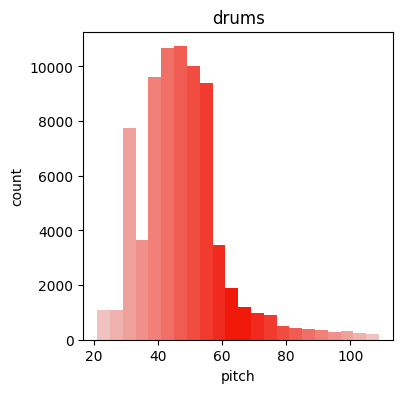

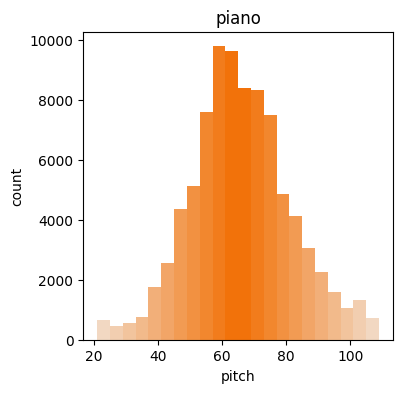

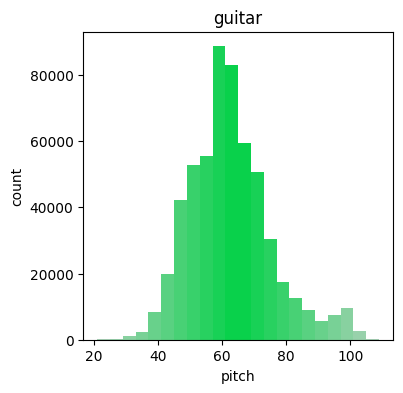

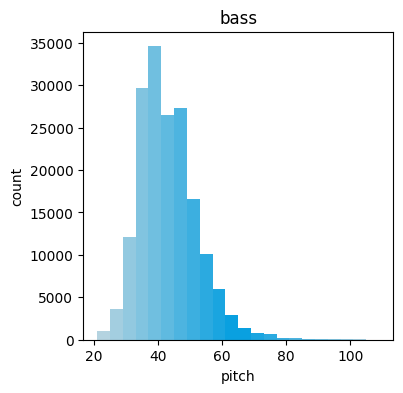

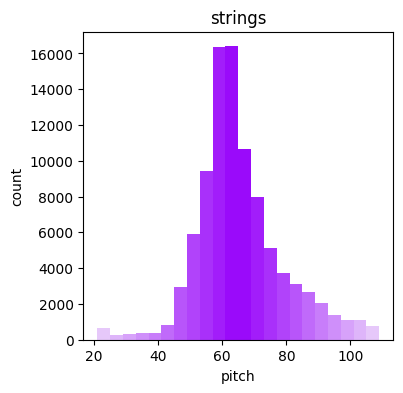

In [11]:
draw_hist("drums", instr_notes["drums"], 4, 94)
draw_hist("piano", instr_notes["piano"], 27, 95)
draw_hist("guitar", instr_notes["guitar"], 140, 82)
draw_hist("bass", instr_notes["bass"], 198, 88)
draw_hist("strings", instr_notes["strings"], 276, 98)

# PPT Figures

In [12]:
ppt_info = []
def get_ppt_notes (midi):
    ppt_instr_notes = {"drums": [], "piano": [], "guitar": [], "bass": [], "strings": []}
    pm = pretty_midi.PrettyMIDI(ppt_path + midi)
    # print(pm.instruments)
    for instr in pm.instruments:
        for note in instr.notes:
            # if note.pitch >= 21 and note.pitch <= 108:
            ppt_instr_notes[instr.name].append(note.pitch)
    ppt_info.append(ppt_instr_notes)

In [15]:
ppt_path = path + 'data/final_ppt_mid/'
ppt_mids = os.listdir(ppt_path)
for file in tqdm(ppt_mids):
    get_ppt_notes(file)

100%|██████████| 5/5 [00:00<00:00,  5.58it/s]


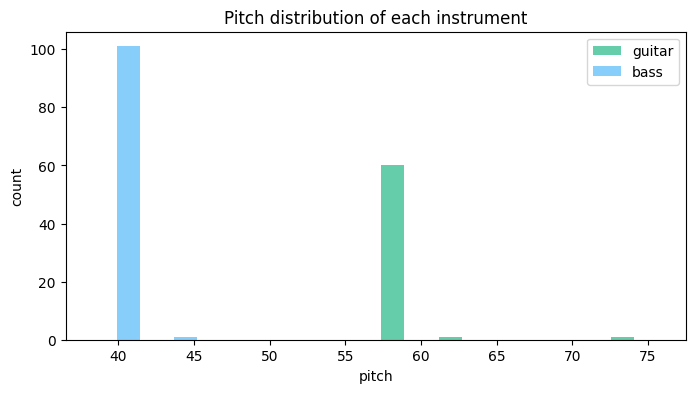

<Figure size 640x480 with 0 Axes>

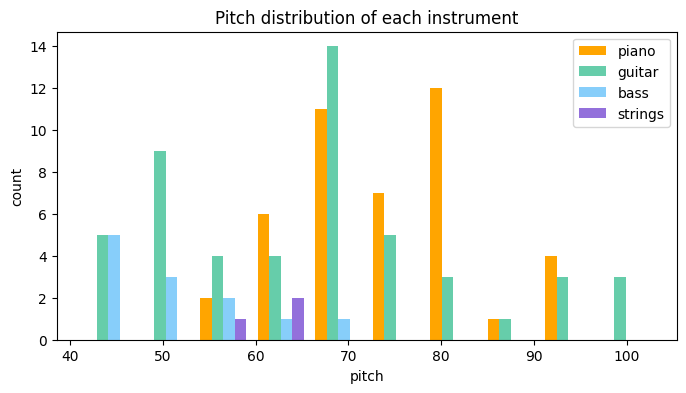

<Figure size 640x480 with 0 Axes>

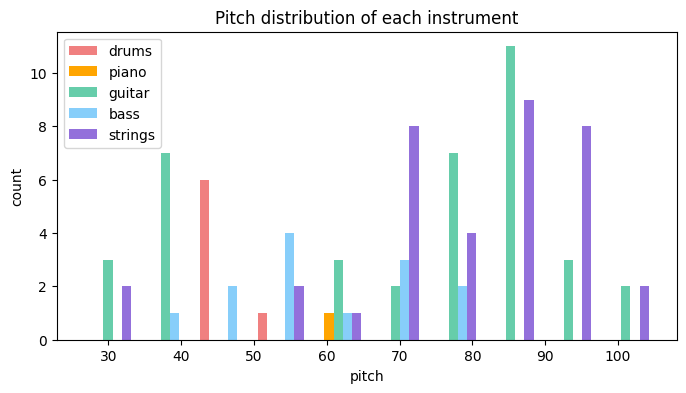

<Figure size 640x480 with 0 Axes>

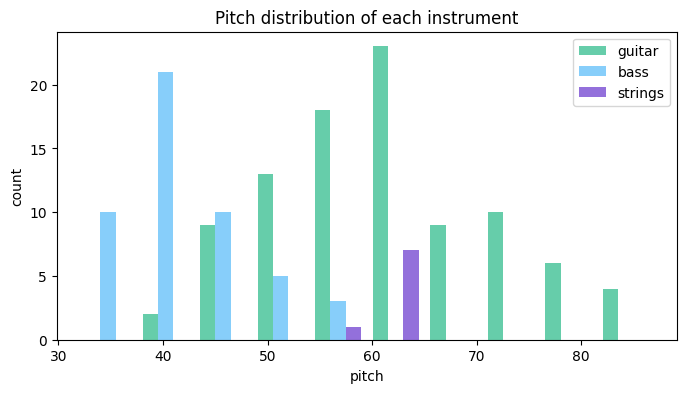

<Figure size 640x480 with 0 Axes>

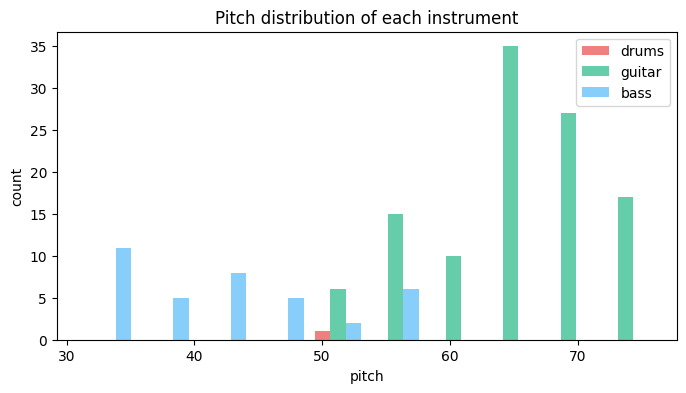

<Figure size 640x480 with 0 Axes>

In [17]:
color = {"drums": 'lightcoral', "piano": 'orange', "guitar": 'mediumaquamarine', "bass": 'lightskyblue', "strings": 'mediumpurple'}
for ppt in ppt_info:
    fig = plt.figure(figsize=(8, 4))
    plt.title('Pitch distribution of each instrument')
    plt.xlabel('pitch')
    plt.ylabel('count')
    data = [val for val in ppt.values() if len(val) > 0]
    labels = [key for key, val in ppt.items() if len(val) > 0]
    colors = [color[key] for key in labels]
    plt.hist(data, color=colors, label=labels)
    plt.legend()
    plt.figure()

# Exercise

In [ ]:
pm = pretty_midi.PrettyMIDI(midi_files[0])
notes = pm.instruments[0].notes

extracted_notes = [pretty_midi.note_number_to_name(note.pitch) for note in notes]
note_set = set(extracted_notes)
print(note_set)

In [ ]:
def midi_to_notes(pm) -> pd.DataFrame:
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
raw_notes = midi_to_notes(midi_data)
raw_notes.head()

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

In [ ]:
plot_piano_roll(raw_notes, count=100)

In [ ]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

In [ ]:
plot_distributions(raw_notes)